<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/DLFZ/DLFZ_ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 乗算レイヤ
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y # x と y をひっくり返す
        dy = dout * self.x
        return dx, dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [ ]:
# 各変数に対する微分
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [ ]:
# 加算レイヤ
class AddLayer:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [ ]:
# 🍎2個と🍊3個の買い物　順伝播で逆伝播
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [10]:
class Relu:
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [ ]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [ ]:
mask = (x <= 0)

In [ ]:
print(mask)

[[False  True]
 [ True False]]


In [ ]:
relu = Relu()

In [ ]:
out = relu.forward(x)
print(out)

[[1. 0.]
 [0. 3.]]


In [ ]:
dout = np.ones_like(x)
print(dout) 
drelu = relu.backward(dout)

[[1. 1.]
 [1. 1.]]


In [ ]:
print(drelu)

[[1. 0.]
 [0. 1.]]


In [ ]:
# こっちだ
print(relu.backward(out))

[[1. 0.]
 [0. 3.]]


In [ ]:
# ↑でも、微分が0になっていることが分かる...
x

array([[ 1. , -0.5],
       [-2. ,  3. ]])

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [ ]:
sig = Sigmoid()

In [ ]:
out = sig.forward(x)
print(out)

[[0.73105858 0.37754067]
 [0.11920292 0.95257413]]


In [ ]:
dx = sig.backward(np.ones_like(x))
print(dx)

[[0.19661193 0.23500371]
 [0.10499359 0.04517666]]


In [3]:
import numpy as np
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [4]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [6]:
dY = np.array([[1,2,3], [4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
dB = np.sum(dY, axis = 0)
dB

array([5, 7, 9])

In [12]:
class Relu:
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
        
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx
# Affineの実装
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        return dx
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    def forward(self, x, t):
        self.t = t
        self.y = softmax(y)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
# from common.layers import *
# from common.gradient import numerical_gradient
from collections import OrderedDict

def softmax(x):
    x = x - np.max(x, axis = -1, keepdims = True)
    return np.exp(x) / np.sum(np.exp(x), axis = -1, keepdims=True)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis = 1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
# 関数
class Relu:
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
        
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx
# Affineの実装
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        return dx
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # レイヤの作成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        if t.ndim != 1:
            t = np.argmax(t, axis = 1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x: 入力データ, t: 教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        # I mistook numerical_gradient() for self.numerical_gradint()
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        # 設定
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        return grads

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        it.iternext()
    return grad
from mnist import load_mnist
# データの読みこみ
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=70, output_size=10)
x_batch=x_train[:3]
t_batch=t_train[:3]
grad_numerical=network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)
# Find the average of the abusolute error of each weight
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:4.216420916114717e-10
b1:2.4354939112209865e-09
W2:5.939378009856995e-09
b2:1.394837561327633e-07


In [23]:
# data loading
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size // batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 誤差逆伝播法によって勾配を求める
    grad = network.gradient(x_batch, t_batch)

    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        loss = network.loss(x_batch, t_batch)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_loss_list.append(loss)
        print(train_acc, test_acc, loss)

0.11178333333333333 0.1145 2.300671766095558
0.9032166666666667 0.9071 0.17120870939579433
0.9158666666666667 0.9176 0.4495189126858428
0.9332166666666667 0.9332 0.1804094426266019
0.94195 0.9412 0.0870769168001058
0.9490666666666666 0.9468 0.06928181222116081
0.9530833333333333 0.9491 0.1774332188227279
0.9599166666666666 0.9554 0.20116052763853326
0.9641833333333333 0.9587 0.06738747662324232
0.9674166666666667 0.9602 0.06958229647101569
0.96845 0.9618 0.04715375463011318
0.9721333333333333 0.9637 0.10425919068281267
0.9723666666666667 0.966 0.05124884863864791
0.97515 0.9666 0.04858672124014067
0.9764166666666667 0.9667 0.08756267624515697
0.9772666666666666 0.9695 0.039482963465146154
0.9784833333333334 0.9692 0.022506531251978518


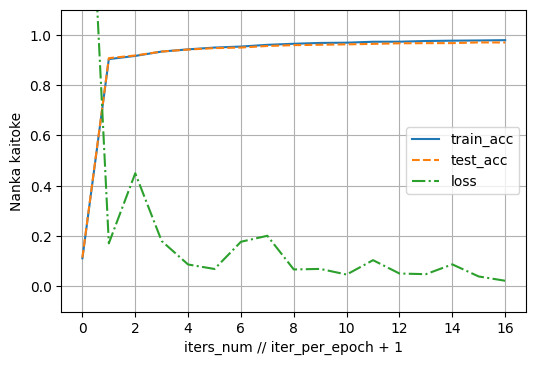

In [39]:
import matplotlib.pyplot as plt
x = np.arange(0,iters_num//iter_per_epoch + 1)

plt.figure(dpi=100)
plt.plot(x, train_acc_list, label='train_acc')
plt.plot(x, test_acc_list, label='test_acc',linestyle='--')
plt.plot(x, train_loss_list, label='loss', linestyle='-.')
plt.xlabel("iters_num // iter_per_epoch + 1")
plt.ylabel("Nanka kaitoke")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid()